In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import cm
import warnings

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

### Problem 4.1
*Part A.1*

In [2]:
delt_H_bar_m = 9.9 #KJ/mol
Tm = 278.6 #K

delt_S_bar_v = delt_H_bar_m/Tm
print(delt_S_bar_v)

0.035534816941852114


*Part A.2*

In [3]:
delt_H_bar_v = 33.9 #KJ/mol
Tv = 353.1 #K

delt_S_bar_v = delt_H_bar_v/Tv
print(delt_S_bar_v)

0.09600679694137637


*Part B*

In [4]:
solid_df = pd.read_csv("./Cp_benzene_solid.txt",sep = '\t', header = None)
vapor_df = pd.read_csv("./Cp_benzene_vapor.txt",sep = '\t', header = None)
liquid_df = pd.read_csv("./Cp_benzene_liquid.txt",sep = '\t', header = None)

Ts_s = np.array(solid_df[0])
Cps_s = np.array(solid_df[1])
Ts_l = np.array(liquid_df[0])
Cps_l = np.array(liquid_df[1])
Ts_v = np.array(vapor_df[0])
Cps_v = np.array(vapor_df[1])

def process_input(Tin, Cpin):
    '''Takes in the data with repeated values e.g. for 298.15 and averages repeats into dictionary keys.
    Then outputs lists with averaged values sorted by first list.'''
    nodups = {}
    for i, j in enumerate(Tin):
        if j in nodups.keys():
            nodups[j] = (nodups[j] + Cpin[i]) / 2 
        else:
            nodups[j] = Cpin[i]
    
    out = []
    a = list(nodups.keys())
    a.sort()
    for item in a:
        out.append(nodups[item])
    return (a, out)

def liquid_fit(T, a, b, c):
    Cp = a*(T**2) + b*T  + c
    return Cp

def solid_fit(T, a):
    Cp = a*T
    return Cp

def vapor_fit(T, a, b):
    Cp =(a*T)/(b + T) #Cp = (a + b*T + c*T*T)/(1 + f*T + g*T*T )
    return Cp

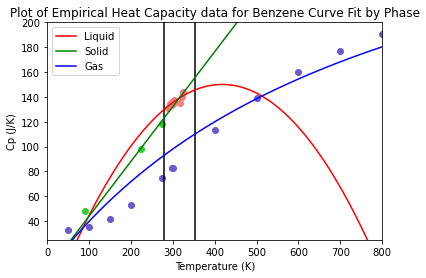

In [5]:
SmoothTs = np.arange(0, 1500, 1)

a, b = process_input(Ts_l, Cps_l)

plt.scatter(a, b, color='lightcoral')
l_ig = [2.56e-4, -0.163, 101] #Initialize fit with values based on those water curve fit
l_popt, l_pcov = curve_fit(liquid_fit, Ts_l, Cps_l, l_ig)
plt.plot(SmoothTs, liquid_fit(SmoothTs, *l_popt), 'r')

plt.scatter(Ts_s, Cps_s, color='limegreen')
s_ig = [Cps_s[-1]/Ts_s[-1]]
s_popt, s_pcov = curve_fit(solid_fit, Ts_s, Cps_s, s_ig)
plt.plot(SmoothTs, solid_fit(SmoothTs, *s_popt), 'g')

plt.scatter(Ts_v, Cps_v, color='slateblue')
v_ig = [228.3, 1387]
v_popt, v_pcov = curve_fit(vapor_fit, Ts_v, Cps_v, v_ig)
plt.plot(SmoothTs, vapor_fit(SmoothTs, *v_popt), 'b')
plt.axis([0, 800, 25, 200]);

plt.vlines(278.6, ymin = 0, ymax = 500) #Melting Point for Benzene at 1atm
plt.vlines(353.1, ymin = 0, ymax = 500) #Boiling Point for Benzene at 1atm

plt.title("Plot of Empirical Heat Capacity data for Benzene Curve Fit by Phase")
plt.xlabel("Temperature (K)")
plt.ylabel("Cp (J/K)")
plt.legend(["Liquid", "Solid", "Gas"]);

*Part F*


In [6]:
#a, b, c = l_popt
d, e = v_popt

Tm = 278.6 #in K
Tv =353.1 #in K

def H_liq(T):
    a, b, c = l_popt
    return (a/3)*T**3 + (b/2)*T**2 + c*T - 7491.2

def S_liq(T):
    a,b,c = l_popt
    return (a/2)*T**2 + b*T + c*np.log(T) + 135.76

H_vap_gas = H_liq(Tv) + 33900
a,b = v_popt
Hconstant = -1* ((a*Tv)-(a*b*np.log(b+Tv)))
Hconstant += H_vap_gas
S_vap_gas = S_liq(Tv) + 96
Sconstant = (-a * np.log(b+Tv)) + S_vap_gas


*Part G*
>The points of phase coexistance are those at which the plots intersect and the value of the chemical potential is minimized. This corresponds to Tm and Tv which are shown as black bars on the graph below. Therefore, the assembled curves' behavior is in line with what we would physically expect.

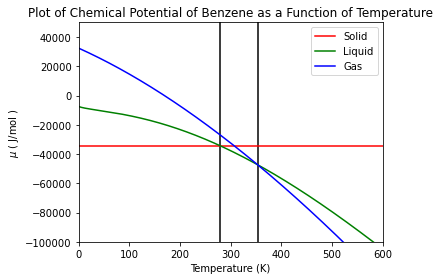

In [7]:
def sol_mu(T):
    return -34229.52

def liq_mu(T):
    a, b, c = l_popt
    return (-(a/6)*T**3) - (b/2)*T**2 + (c - 135.76)*T - c*T*np.log(T) - 7491.2

def gas_mu(T):
    a, b = v_popt
    return a*T - a*b*np.log(b+T) + 1995516.7 - a*T*np.log(b+T) + 2271.8*T

Temps = np.arange(1, 1000, 1)
Mu_sols = [sol_mu(T) for T in Temps]
#print(Mu_sols)
Mu_liqs = [liq_mu(T) for T in Temps]
Mu_gases = [gas_mu(T) for T in Temps]

plt.plot(Temps, Mu_sols, 'r')
plt.plot(Temps, Mu_liqs, 'g')
plt.plot(Temps, Mu_gases, 'b')

plt.vlines(Tm, ymin = -150000, ymax = 50000)#, color="y")
plt.vlines(Tv, ymin = -150000, ymax = 50000)#, color="m")

plt.legend(["Solid", "Liquid", "Gas"])
plt.axis([0, 600,-100000, 50000])
plt.xlabel("Temperature (K)")
plt.ylabel("${\mu}$ ( J/mol )")
plt.title("Plot of Chemical Potential of Benzene as a Function of Temperature")
plt.tight_layout()


### Problem 4.2A
*Part A*

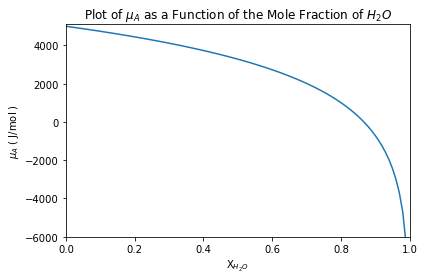

In [8]:
def mu_A(x_h2o):
    mu_std = 5 * 1000 #KJ/mol * 1000 J/KJ
    R = 8.3145 #J * mol^-1 * K-1
    T = 298.15 #K
    return mu_std + R*T*np.log(1-x_h2o)
Xs = np.arange(0, 1, 0.01)
Ys = [mu_A(i) for i in Xs]
plt.plot(Xs, Ys)
plt.axis([0,1, -6000, 5100])
plt.xlabel("X$_{H_2O}$")
plt.ylabel("${\mu_A}$ ( J/mol )")
plt.title("Plot of ${\mu_A}$ as a Function of the Mole Fraction of $H_2O$")
plt.tight_layout()

### Problem 4.4

<IPython.core.display.Javascript object>


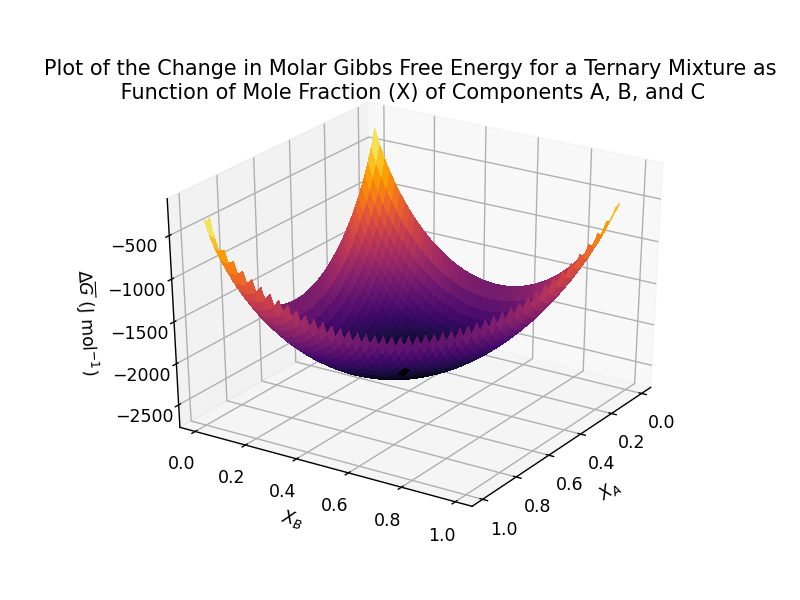

9.134411874130997


In [9]:
%matplotlib notebook
#makes 3D plots rotatable for easier inspection. Was breaking 2D graphs above import statements.
warnings.filterwarnings("ignore") #Hide warnings about NaN values in plot. Plot takes care of them
def Gibbs(Xa, Xb):
    R = 8.3145 #J/mol*K
    T = 298.15 #Assume room temperature in K
    Xc = 1 - Xa - Xb
    out = R*T*(Xa*np.log(Xa) + Xb*np.log(Xb) + Xc*np.log(Xc))
    return out
    
def Ent(Xa, Xb):
    R = 8.3145 #J/mol*K
    Xc = 1 - Xa - Xb
    out = -R*(Xa*np.log(Xa) + Xb*np.log(Xb) + Xc*np.log(Xc))
    return out

X = np.arange(0.01, 1, 0.01)
Y = np.arange(0.01, 1, 0.01)
X,Y = np.meshgrid(X,Y)
Z = Gibbs(X,Y)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("$X_A$")
ax.set_ylabel("$X_B$")
ax.set_zlabel("\n$\Delta\overline{G}$ (J mol$^{-1}$)")
ax.set_title("Plot of the Change in Molar Gibbs Free Energy for a Ternary Mixture as\n Function of Mole Fraction (X) of Components A, B, and C")
_min = Gibbs(1/3, 1/3)
_max = Gibbs(0.01, 0.01)
surf = ax.plot_surface(X, Y, Z, cmap=cm.inferno, linewidth=0, antialiased=False, vmin=_min, vmax=_max)
plt.show()


<IPython.core.display.Javascript object>


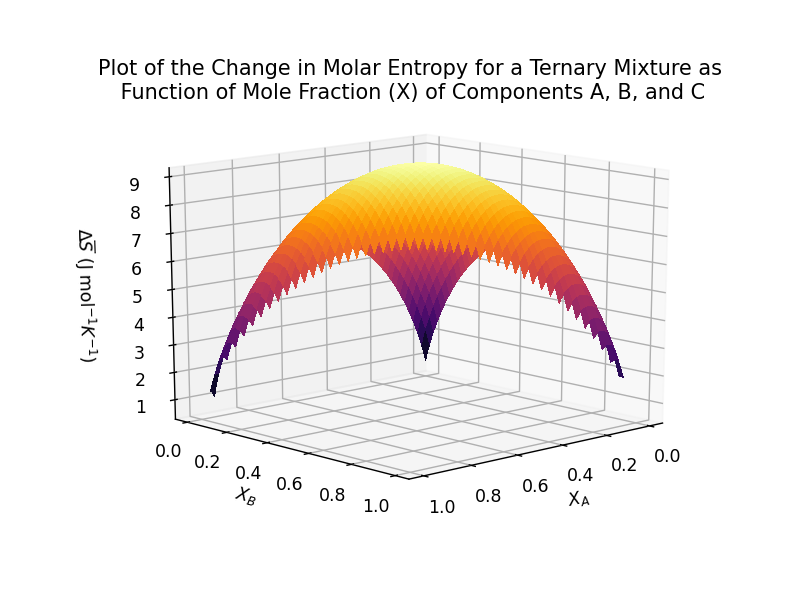

In [14]:
def Ent(Xa, Xb):
    R = 8.3145 #J/mol*K
    Xc = 1 - Xa - Xb
    out = -R*(Xa*np.log(Xa) + Xb*np.log(Xb) + Xc*np.log(Xc))
    return out

X = np.arange(0.01, 1, 0.01)
Y = np.arange(0.01, 1, 0.01)
X,Y = np.meshgrid(X,Y)
Z = Ent(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("$X_A$")
ax.set_ylabel("$X_B$")
ax.set_zlabel("\n$\Delta\overline{S}$ (J mol$^{-1} K^{-1}$)")
ax.set_title("Plot of the Change in Molar Entropy for a Ternary Mixture as\n Function of Mole Fraction (X) of Components A, B, and C")
_max = Ent(1/3, 1/3)
_min = Ent(0.01, 0.01)
surf = ax.plot_surface(X, Y, Z, cmap=cm.inferno, linewidth=0, antialiased=False, vmin=_min, vmax=_max)
plt.show()

### Problem 4D
*Part 3*

<IPython.core.display.Javascript object>


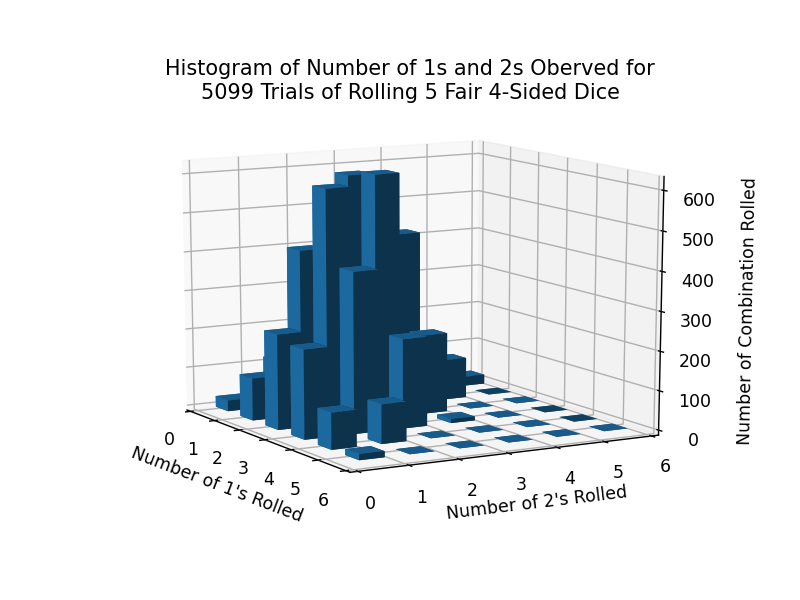

In [11]:
df_t = pd.read_csv("d3comps_true.csv")
trues = np.array(df_t)
x_trues = np.array([i[0:1][0] for i in trues]) #All the unbiased ones
y_trues = np.array([i[1:2][0] for i in trues]) #All the unbiased twos, threes can be implied because sum of all = 3

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
hist, xedges, yedges = np.histogram2d(x_trues, y_trues, bins=6, range=[[0, 6], [0, 6]])
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()
ax.set_xlabel("Number of 1's Rolled")
ax.set_ylabel("Number of 2's Rolled")
ax.set_zlabel("\nNumber of Combination Rolled")
ax.set_title("Histogram of Number of 1s and 2s Oberved for\n5099 Trials of Rolling 5 Fair 4-Sided Dice")
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average');

<IPython.core.display.Javascript object>


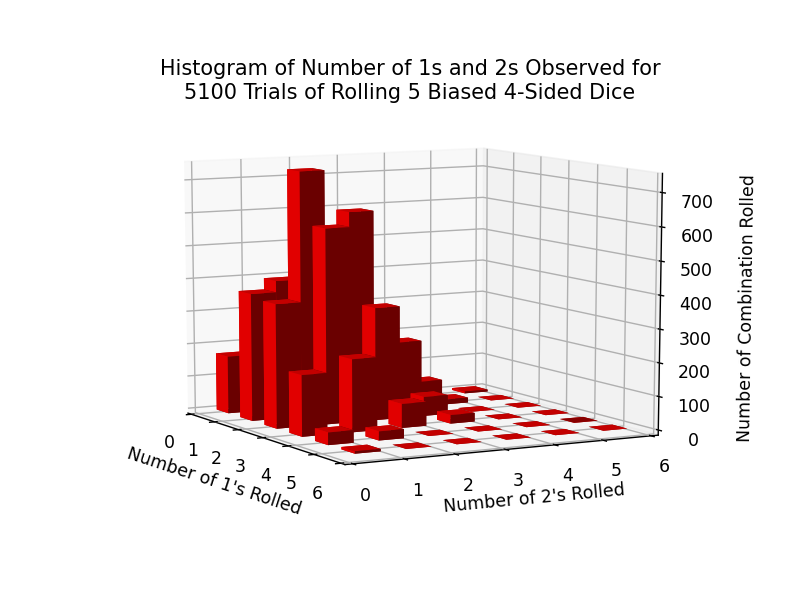

In [12]:
df_b = pd.read_csv("d3comps_biased.csv")
biased = np.array(df_b)
x_bias = np.array([i[0:1][0] for i in biased]) #All the biased ones
y_bias = np.array([i[1:2][0] for i in biased]) #All the biased twos, threes can be implied because sum of all = 3

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection="3d")
hist2, xedges2, yedges2 = np.histogram2d(x_bias, y_bias, bins=6, range=[[0, 6], [0, 6]])
xpos2, ypos2 = np.meshgrid(xedges2[:-1] + 0.25, yedges2[:-1] + 0.25, indexing="ij")
xpos2 = xpos2.ravel()
ypos2 = ypos2.ravel()
zpos2 = 0
dx2 = dy2 = 0.5 * np.ones_like(zpos2)
dz2 = hist2.ravel()

ax2.set_xlabel("Number of 1's Rolled")
ax2.set_ylabel("Number of 2's Rolled")
ax2.set_zlabel("\nNumber of Combination Rolled")
ax2.set_title("Histogram of Number of 1s and 2s Observed for\n5100 Trials of Rolling 5 Biased 4-Sided Dice")
ax2.bar3d(xpos2, ypos2, zpos2, dx2, dy2, dz2, zsort='average', color = "red");

*Part 4*
> Why is it OK to throw out the third value in the composition (e.g. N3)?
- We can throw out the third value because we rolled 5 dice for every trial. Therefore, when we look at our 3D plot, the value of the third die is implied as 5 - X - Y. 
>>**Ex:** The peak in the biased data appears where there is 1 one rolled and 1 two rolled (as the bins for the histogram are left-side inclusive and right-side exclusive). Therefore, there must have been 3 threes rolled for these trials as the sum of all the dice must equal 5

*Part 5*
> The unbiased distribition has a peak at three pairs of x and y. Those being: (2, 2), (2, 1), and (1, 2) which correspond to values of 1, 2, and 2 for the number of threes rolled for each respectively. This is expected as since each is equally likely, getting 2 of two of the values and 1 of the other has the highest probability. Each also has an equally likely (1/3) chance to be the number with only one die given that one of these peaks is rolled. 

> The biased distribution has one peak with a corresponding x, y pair of 1, 1. This implies that there were 3 threes rolled for these trials. This is expected as the dice we rolled were biased to return a three 50% of the time. This peak is slightly above two lower peaks corresponding to (2,1) and (1,2) x,y pairs which both imply a value of 2 threes rolled. These outcomes were slightly less abundant than the outcome with 3 threes. All of these probabilities can be calculated with the multinomial distribution. 

>Because the two distributions have different peak behavior, they are different as expected. 

*Part 6*
> The meshes that I have generated below from the theoretical outcomes of the multinomial distribution do appear to align with our empirical data

<IPython.core.display.Javascript object>


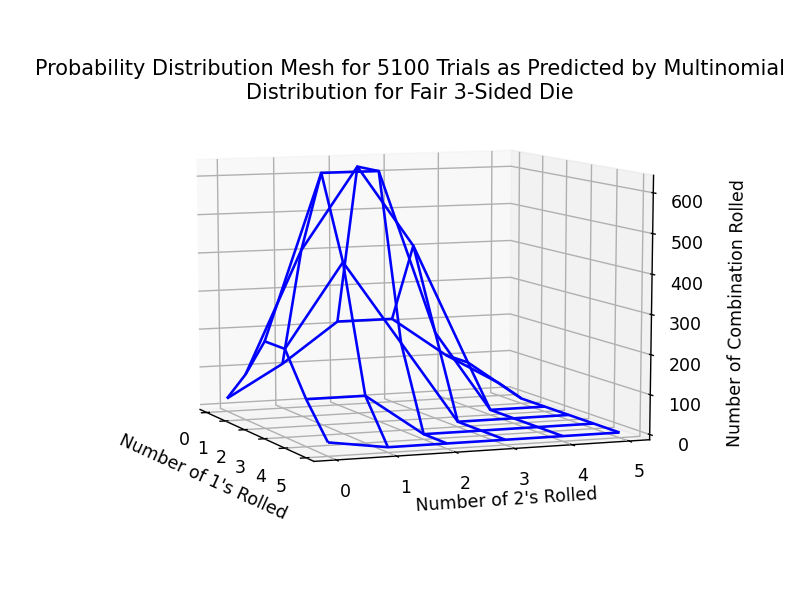

<IPython.core.display.Javascript object>


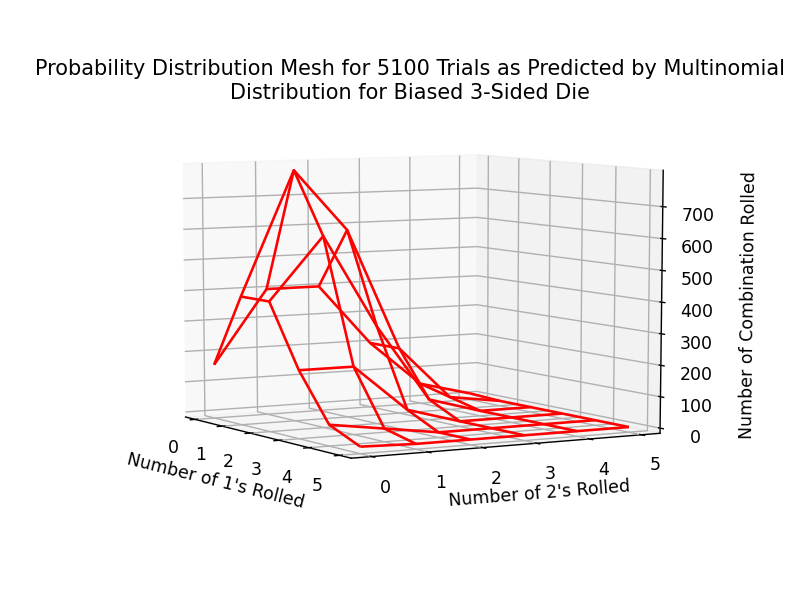

In [13]:
def nchoosek(a, *b):
    try:
        out = np.math.factorial(a)
        for i in b:
            out /= np.math.factorial(i)
    except:
        out = 0
    return out


def unbiased(x, y):
    z = 5 - x - y
    p = 1/3
    out = nchoosek(5, x, y, z) * (p**5)
    return out
    
    
    
def biased(x, y):
    px = py = 1/4
    pz = 1/2
    z = 5 - x - y
    out = nchoosek(5, x, y, z) * (px ** x) * (py ** y) * (pz ** z)
    return out
    
Xs = np.arange(0, 6, 1)
Ys = np.arange(0, 6, 1)

X, Y = np.meshgrid(Xs, Ys)
Z = []
Ntot = 5100
for i in Xs:
    zs = []
    for j in Ys:
        zs.append(unbiased(Xs[i], Ys[j]) * Ntot)
    Z.append(np.array(zs))
Z = np.array(Z)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='blue')
ax.set_xlabel("Number of 1's Rolled")
ax.set_ylabel("Number of 2's Rolled")
ax.set_zlabel("\nNumber of Combination Rolled")

ax.set_title('Probability Distribution Mesh for 5100 Trials as Predicted by Multinomial\nDistribution for Fair 3-Sided Die')
plt.show()

X2, Y2 = np.meshgrid(Xs, Ys)
Z2 = []
for i in Xs:
    z2s = []
    for j in Ys:
        z2s.append(biased(Xs[i], Ys[j]) * Ntot)
    Z2.append(np.array(z2s))
Z2 = np.array(Z2)
fig2 = plt.figure()
ax2 = plt.axes(projection='3d')
ax2.plot_wireframe(X2, Y2, Z2, color='red')
ax2.set_xlabel("Number of 1's Rolled")
ax2.set_ylabel("Number of 2's Rolled")
ax2.set_zlabel("\nNumber of Combination Rolled")
ax2.set_title('Probability Distribution Mesh for 5100 Trials as Predicted by Multinomial\nDistribution for Biased 3-Sided Die')
plt.show()